# Data for research

In [2]:
# from model import *
import time
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [3]:
data = np.load('training_data.npz')
XTrain = data['x']
YTrain = data['y']
input_shape_gen = (XTrain.shape[1], XTrain.shape[2], XTrain.shape[3])
input_shape_disc = (YTrain.shape[1], YTrain.shape[2], YTrain.shape[3])

In [6]:
XTrain.shape

(5462, 225, 225, 4)

In [7]:
YTrain.shape

(5462, 225, 225, 1)

## Preperation data
We want to resize our training data for the research we are doing. It takes almost 2 days to train our model on a full data set. At the moment, we would like to reduce this time to a few hours to fine-tune our model. 
Let's focus on areas with compose pixels light and dark.

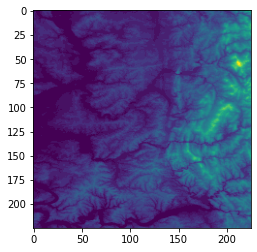

In [88]:
test_img = YTrain[13]
plt.imshow(test_img)

In [136]:
def dark_areas_image(data_image):
    list_of_idx_image = []
    for idx in range(len(data_image)):
        unique, count = np.unique(data_image[idx]<0, return_counts=True)
        diff = np.diff(count)
        if diff > -5000 and diff < 5000:
            list_of_idx_image.append(idx)
    return list_of_idx_image

In [137]:
list_of_dark_area_idx = dark_areas_image(YTrain)

<ipython-input-136-944e9c4bd0dd>:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff > -5000 and diff < 5000:


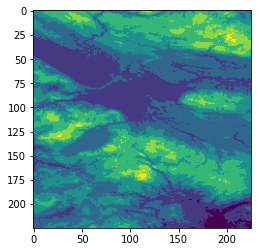

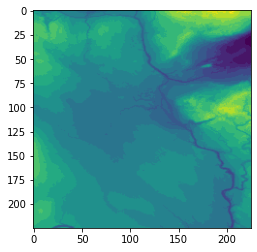

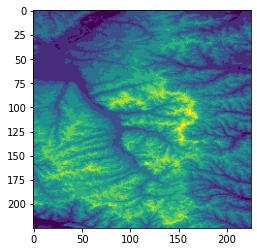

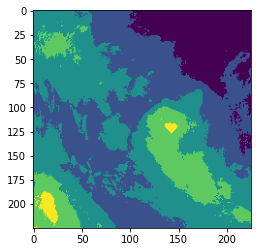

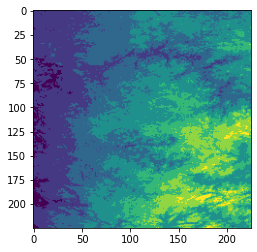

In [142]:
for i in range(5):
    plt.imshow(YTrain[list_of_dark_area_idx[i]])
    plt.show()

In [138]:
print('Origin size:',YTrain.shape[0], '  New size:', len(list_of_dark_area_idx))

Origin size: 5462   New size: 585


In [140]:
np.savez('training_data_research.npz', x=XTrain[list_of_dark_area_idx], y=YTrain[list_of_dark_area_idx])